In [97]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
from ipywidgets import interact, widgets, FloatSlider, interactive_output

from IPython.display import display, clear_output


In [105]:
def plotNormal(sigma):
    # Calculate the probability density function (PDF) values for the Gaussian distribution
    pdf_values = norm.pdf(x, 0, sigma)
    
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Gaussian Distribution')
    plt.ylim(0, 1.0)
    plt.grid(True)
    plt.plot(x, pdf_values, 'r-', lw=2)
    

In [106]:
sigma_slider = FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Sigma')

interact(plotNormal, sigma=sigma_slider);

plt.show()

interactive(children=(FloatSlider(value=1.0, description='Sigma', max=2.0, min=0.1), Output()), _dom_classes=(…

In [54]:
def plotMixed(sigma, scalar_value):
    # Generate x values
    x = np.linspace(-5, 15, 1000)
    
    # Calculate the probability density function (PDF) values for the Gaussian distribution
    pdf_values = norm.pdf(x, 0, sigma) * scalar_value

    uniform_xs = np.linspace(15, 20, 100)
    uniform_ys = [(1.0 - scalar_value) / 5] * len(uniform_xs)
    
    # Plot the Gaussian curve
    plt.plot(np.concatenate((x,uniform_xs)), np.concatenate((pdf_values, uniform_ys)), 'r-', lw=2)
    
    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Gaussian Distribution')
    plt.ylim(0, 1.0)
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [107]:
# Define the slider
sigma_slider = FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Sigma')
scalar_slider = FloatSlider(value=1.0, min=0.0, max=1.0, step=0.1, description='Scalar')

# Display the interactive plot
interact(plotMixed, sigma=sigma_slider, scalar_value=scalar_slider);

interactive(children=(FloatSlider(value=1.0, description='Sigma', max=2.0, min=0.1), FloatSlider(value=1.0, de…

In [108]:
def optimizeMixedDist(startUniform, endUniform, sigma):
    uniformWidth = endUniform - startUniform
    if uniformWidth == 0.0:
        return 1.0
    # Define the objective function to minimize
    def objective(s):
        scaledGaussianHeight = s * norm.pdf(0, 0, sigma)
        
        remainingArea = 1 - s
        scaledUniformHeight = remainingArea / uniformWidth
        
        return abs(scaledGaussianHeight - scaledUniformHeight)
    
    # Use numerical optimization to find the optimal height of the uniform section
    return minimize_scalar(objective, bounds=(0, 1), method='bounded').x


In [109]:
def plotOptimizedMixed(startUniform, endUniform, sigma):
    optimalScalar = optimizeMixedDist(startUniform, endUniform, sigma)
    print('optimalScalar:',optimalScalar)
    
    # Generate left normal values
    xleft = np.linspace(startUniform-5, startUniform, 100)
    pdf_values_left = norm.pdf(xleft, startUniform, sigma) * optimalScalar
    
    # Generate left normal values
    xright = np.linspace(endUniform, endUniform+5, 100)
    pdf_values_right = norm.pdf(xright, endUniform, sigma) * optimalScalar
    
    # Plot the Gaussian curve
    plt.plot(np.concatenate((xleft,xright)), np.concatenate((pdf_values_left, pdf_values_right)), 'r-', lw=2)
    
    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Gaussian Distribution')
    plt.xlim(-12, 12)
    plt.ylim(0, 1.0)
    plt.grid(True)
    
    # Show the plot
    plt.show()

In [110]:
# Define the slider
sigma_slider = FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Sigma')
a_slider = FloatSlider(value=-5, min=-10, max=0, step=0.1, description='Start Uniform Value')
b_slider = FloatSlider(value=5, min=0, max=10, step=0.1, description='End Uniform Value')

# Display the interactive plot
interact(plotOptimizedMixed, startUniform=a_slider, endUniform=b_slider, sigma=sigma_slider);

interactive(children=(FloatSlider(value=-5.0, description='Start Uniform Value', max=0.0, min=-10.0), FloatSli…

In [111]:
def sampleMixedDist():
    whichDistToSample = np.random.random_sample()

    if whichDistToSample <= optimalScalar:
        # Sample gaussian
        sampledValue = np.random.normal(0, sigma)
        if sampledValue < 0.0:
            sampledValue = A + sampledValue
        else:
            sampledValue = B + sampledValue
    else:
        # Sample uniform
        sampledValue = np.random.uniform(A, B)
    return sampledValue


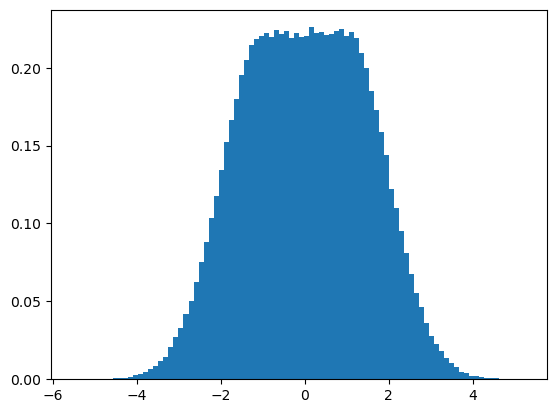

In [112]:
samples = []
for i in range(500000):
    samples.append(sampleMixedDist())
    
plt.hist(samples, bins=90, density=True);